In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from dtaidistance import dtw
from sklearn.metrics import silhouette_score, davies_bouldin_score

import utils
import predictive_clustering
import predictive_plots

### Prediction on Rating0 differenciated by Match and Emotion on RETOS & BEBRASK using Time Series


In [2]:
data = pd.read_excel("RETOS_BEBRASK_Rating0_Time_Series.xlsx")
data

,Subject ID,Happy_0_0,Happy_0_1,Happy_0_2,Happy_0_3,Happy_0_4,Happy_0_5,Happy_1_0,Happy_1_1,Happy_1_2,...,Fear_0_5,Fear_1_0,Fear_1_1,Fear_1_2,Fear_1_3,Fear_1_4,Fear_1_5,Fear_1_6,Fear_1_7,Fear_1_8
0,PREDWELL_RETOS-1001-1,4,1,1,1,1,1,4,4,4,...,3,4,1,3,2,3,4,3,3,4
1,PREDWELL_RETOS-1002-1,1,1,3,1,1,1,3,4,4,...,1,3,1,3,4,3,4,2,3,4
2,PREDWELL_RETOS-1003-1,1,1,1,1,1,1,3,3,4,...,2,2,2,3,2,2,2,1,3,3
3,PREDWELL_RETOS-1004-1,1,1,3,3,2,1,1,4,2,...,2,2,4,3,1,3,3,2,1,3
4,PREDWELL_RETOS-1005-1,1,1,1,1,2,1,4,3,4,...,1,2,2,2,3,3,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,PREDWELL_RETOS-5-1,2,2,1,1,1,1,3,4,4,...,1,1,1,4,2,4,3,3,2,2
145,PREDWELL_RETOS-6-1,1,2,1,1,1,1,3,3,4,...,1,2,2,2,4,2,3,2,4,4
146,PREDWELL_RETOS-7-1,1,1,1,1,1,1,3,4,2,...,4,4,1,2,4,4,1,4,4,1
147,PREDWELL_RETOS-8-1,1,1,1,1,1,1,4,4,1,...,3,3,3,4,3,2,4,2,1,3


In [3]:
scales_BEBRASK = pd.read_excel("../Datasets/RETOS_scales.xlsx")
scales_RETOS = pd.read_excel("../Datasets/BEBRASK_scales.xlsx")
scales = pd.concat([scales_BEBRASK, scales_RETOS])

#Removing PREDWELL_RETOS-307-1 that has different number of answers per emotion, and converting columns to numerical and coercing errors to NaN.
scales = scales.query("EPRIME_CODE != 'PREDWELL_RETOS-307-1'")
cols = scales.columns
scales[cols[3:]] = scales[cols[3:]].apply(pd.to_numeric, errors='coerce')

In [4]:
temporal_happy_0 = data[["Subject ID","Happy_0_0","Happy_0_1","Happy_0_2","Happy_0_3","Happy_0_4","Happy_0_5"]]
temporal_happy_1 = data[["Subject ID","Happy_1_0","Happy_1_1","Happy_1_2","Happy_1_3","Happy_1_4","Happy_1_5","Happy_1_6","Happy_1_7","Happy_1_8"]]
temporal_fear_0 = data[["Subject ID","Fear_0_0","Fear_0_1","Fear_0_2","Fear_0_3","Fear_0_4","Fear_0_5"]]
temporal_fear_1 = data[["Subject ID","Fear_1_0","Fear_1_1","Fear_1_2","Fear_1_3","Fear_1_4","Fear_1_5","Fear_1_6","Fear_1_7","Fear_1_8"]]
temporal_sad_0 = data[["Subject ID","Sad_0_0","Sad_0_1","Sad_0_2","Sad_0_3","Sad_0_4","Sad_0_5"]]
temporal_sad_1 = data[["Subject ID","Sad_1_0","Sad_1_1","Sad_1_2","Sad_1_3","Sad_1_4","Sad_1_5","Sad_1_6","Sad_1_7","Sad_1_8"]]

In [5]:
PANAS = ["PA", "NA."]
ERQ = ["ERQ_CR", "ERQ_ES"]
UPPSP = ["UPPSP_NU", "UPPSP_PU", "UPPSP_SS", "UPPSP_PMD", "UPPSP_PSV"]
BIS_BAS = ["BIS", "BAS_D", "BAS_RR", "BAS_FS"]
TEPS = ["TEPS_AF", "TEPS_CF"]
SHS = ["SHS"]
FS = ["FS"]
LOTR = ["LOT_R"]
RRQ = ["RRQ_Rum", "RRQ_Ref"]
ASI3 = ["ASI_P", "ASI_C", "ASI_S"]
SPQ = ["SPQ", "SPQ_IR"]
MSSB = ["MSSB_POS", "MSSB_NEG", "MSSB_DES"]

list_metrics = [PANAS, ERQ, UPPSP, BIS_BAS, TEPS, SHS, FS, LOTR, RRQ, ASI3, SPQ, MSSB]

## Hierarchical Clustering using Dynamic Time Warping
#### Happy Match

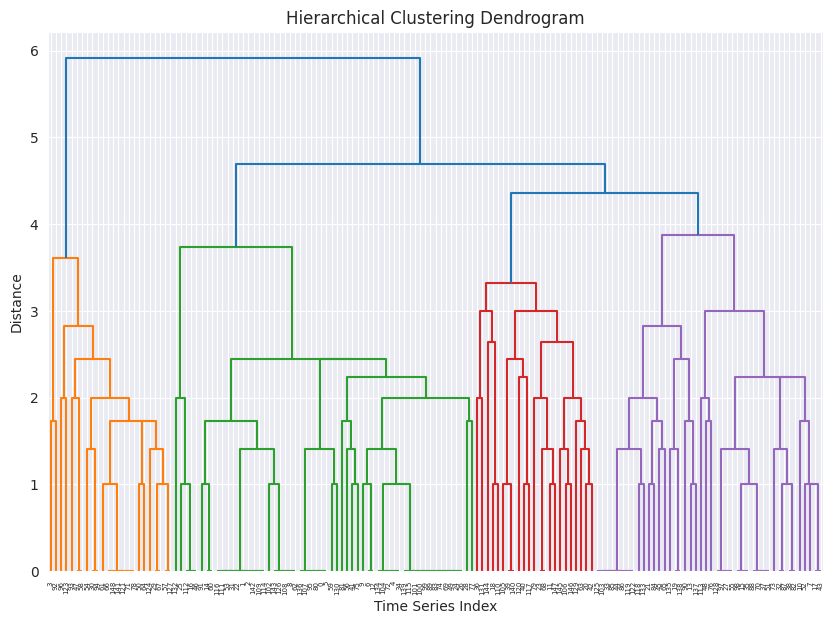

In [6]:
ts_data = temporal_happy_1.drop(["Subject ID"], axis=1).to_numpy()
params = {'method':'complete'}
Z = predictive_clustering.hierarchical_clustering_ts([ts_data],dtw.distance_matrix_fast,params=params)

In [7]:
params_clust = {'t':4,'criterion':'maxclust'}
cluster_data_happy1 =  predictive_clustering.create_cluster_df(Z,temporal_happy_1.copy(),params = params_clust)
print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_happy1["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_happy1["clusters"]))


Silhouette score: 0.007404144429389919
Davies-Bouldin score: 6.016899429795698


In [8]:
#Creation of the word document containing the boxplots and table with some metrics
name_output = f"time_series_happy_match.docx"
new_data = pd.merge(scales.copy(),cluster_data_happy1.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID",axis=1,inplace=True)

df = utils.filter_data(new_data)

utils.create_word(df,list_metrics, name_output)

/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots

In [9]:
output_name = f'Clusters_TimeSeries/time_series_predictive_processing_happy_match_clusters.xlsx'
utils.export_clusters_df(cluster_data_happy1.copy(),output_name)


In [10]:
# Scales Metrics
utils.create_metrics_cluster_df(cluster_data_happy1.copy(),scales)

,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,BIS_mean,...,RRQ_Rum_mean,RRQ_Ref_mean,ASI_P_mean,ASI_C_mean,ASI_S_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,32.46,19.50,4.82,2.90,8.50,10.42,9.96,8.29,7.42,21.25,...,3.39,3.39,4.57,2.96,7.71,2.33,3.06,2.17,1.89,1.83
2,33.62,19.31,4.97,3.22,8.29,9.50,11.03,6.91,6.88,21.43,...,3.22,3.36,3.76,2.75,7.76,2.07,2.41,1.65,1.83,1.67
3,32.74,21.13,5.08,3.00,9.35,9.96,10.61,8.00,7.35,22.52,...,3.50,3.36,5.70,4.13,10.61,2.70,2.65,1.60,2.15,3.25
4,33.43,21.48,4.73,2.88,9.64,9.95,11.23,7.27,6.91,21.61,...,3.33,3.36,5.55,4.59,8.07,2.08,2.81,2.36,1.86,2.72


In [11]:
#Means tasks
utils.create_mean_tasks(data,cluster_data_happy1.copy())


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,2.0,1.229885,3.626437,1.744253,2.888889,1.853448,2.758621
1,1.0,1.236111,3.162037,1.694444,2.541667,1.715278,2.606481
2,4.0,1.204545,3.383838,1.731061,2.729798,1.795455,2.734848
3,3.0,1.166667,3.246377,1.717391,2.782609,1.789855,2.661836


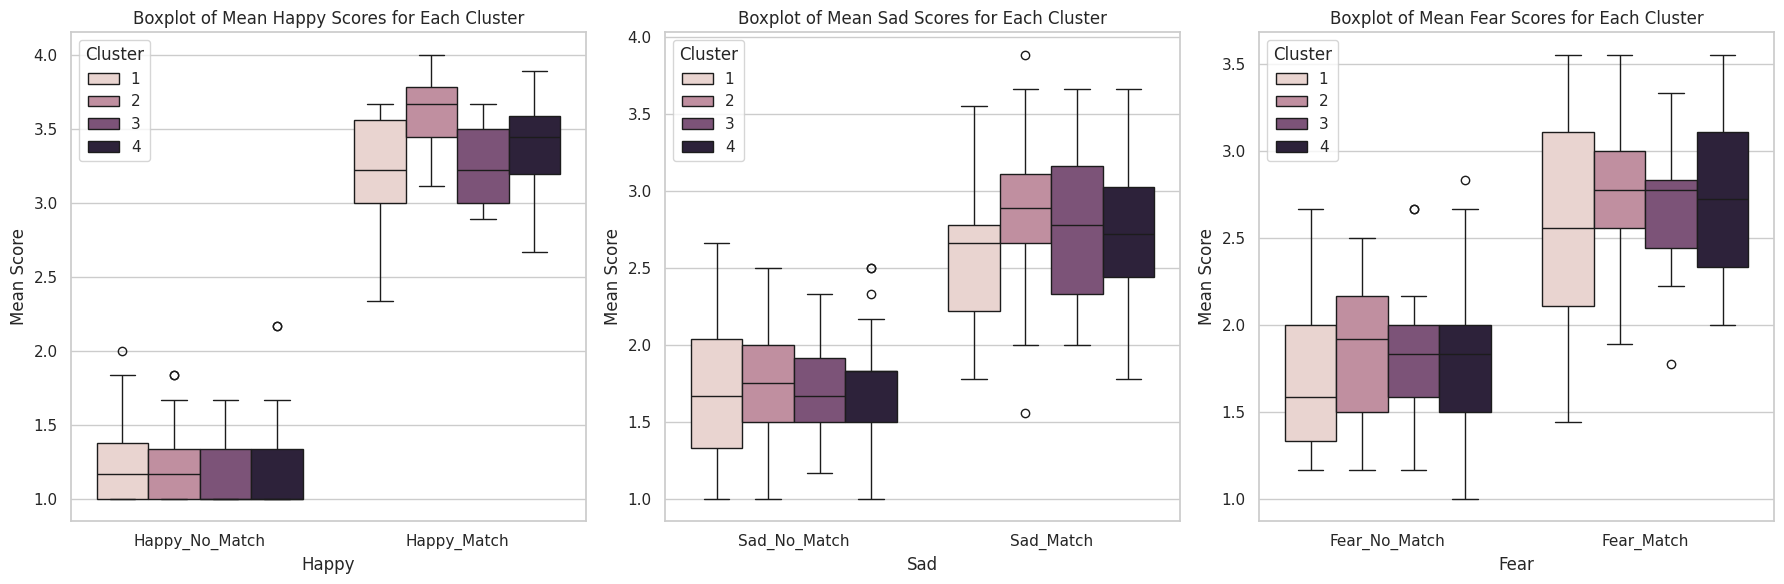

In [13]:
#Boxplots tasks
predictive_plots.create_boxplot_clusters(data,cluster_data_happy1)

#### Happy Non Match


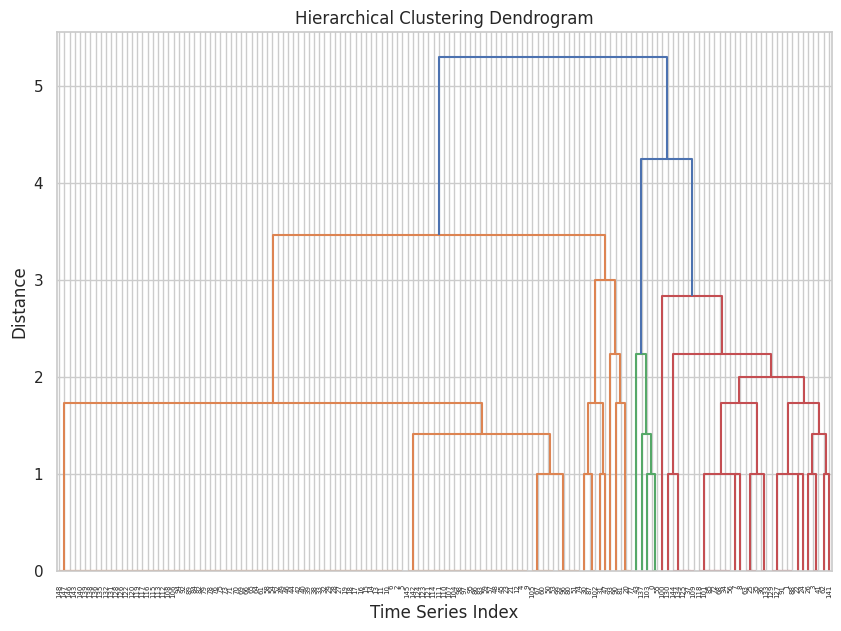

In [14]:
ts_data = temporal_happy_0.drop(["Subject ID"], axis=1).to_numpy()
Z = predictive_clustering.hierarchical_clustering_ts([ts_data],dtw.distance_matrix_fast,params=params)


In [15]:
params_clust = {'t':3,'criterion':'maxclust'}
cluster_data_happy0 =  predictive_clustering.create_cluster_df(Z,temporal_happy_0.copy(),params = params_clust)

print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_happy0["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_happy0["clusters"]))


Silhouette score: 0.02044712570646001
Davies-Bouldin score: 6.376322824837079


In [16]:
#Creation of the word document containing the boxplots and table with some metrics
name_output = f"time_series_happy_no_match.docx"
new_data = pd.merge(scales.copy(), cluster_data_happy0.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID", axis=1, inplace=True)

df = utils.filter_data(new_data)

utils.create_word(df, list_metrics, name_output)


/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots

In [17]:
output_name = f'Clusters_TimeSeries/time_series_predictive_processing_happy_non_match_clusters.xlsx'
utils.export_clusters_df(cluster_data_happy0.copy(),output_name)


In [18]:
# Scales Metrics
utils.create_metrics_cluster_df(cluster_data_happy0,scales)


,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,BIS_mean,...,RRQ_Rum_mean,RRQ_Ref_mean,ASI_P_mean,ASI_C_mean,ASI_S_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,33.90,19.68,4.96,2.91,8.67,9.68,10.89,7.45,7.12,21.36,...,3.28,3.40,4.62,3.39,7.78,2.09,2.64,1.90,1.85,1.99
2,35.20,21.60,5.00,3.55,8.80,9.20,11.20,6.00,5.00,21.80,...,3.25,3.40,2.80,1.80,10.80,2.33,3.00,3.67,2.00,2.33
3,30.73,22.00,4.66,3.36,9.64,10.52,10.67,7.48,7.12,22.48,...,3.46,3.26,5.34,4.38,9.58,2.68,2.72,1.84,2.08,3.32


In [19]:
#Means tasks
utils.create_mean_tasks(data,cluster_data_happy0)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,2.0,1.633333,3.577778,1.966667,3.066667,2.100000,2.977778
1,3.0,1.444444,3.457912,1.772727,2.777778,1.868687,2.801347
2,1.0,1.126126,3.403403,1.704204,2.753754,1.771772,2.673674


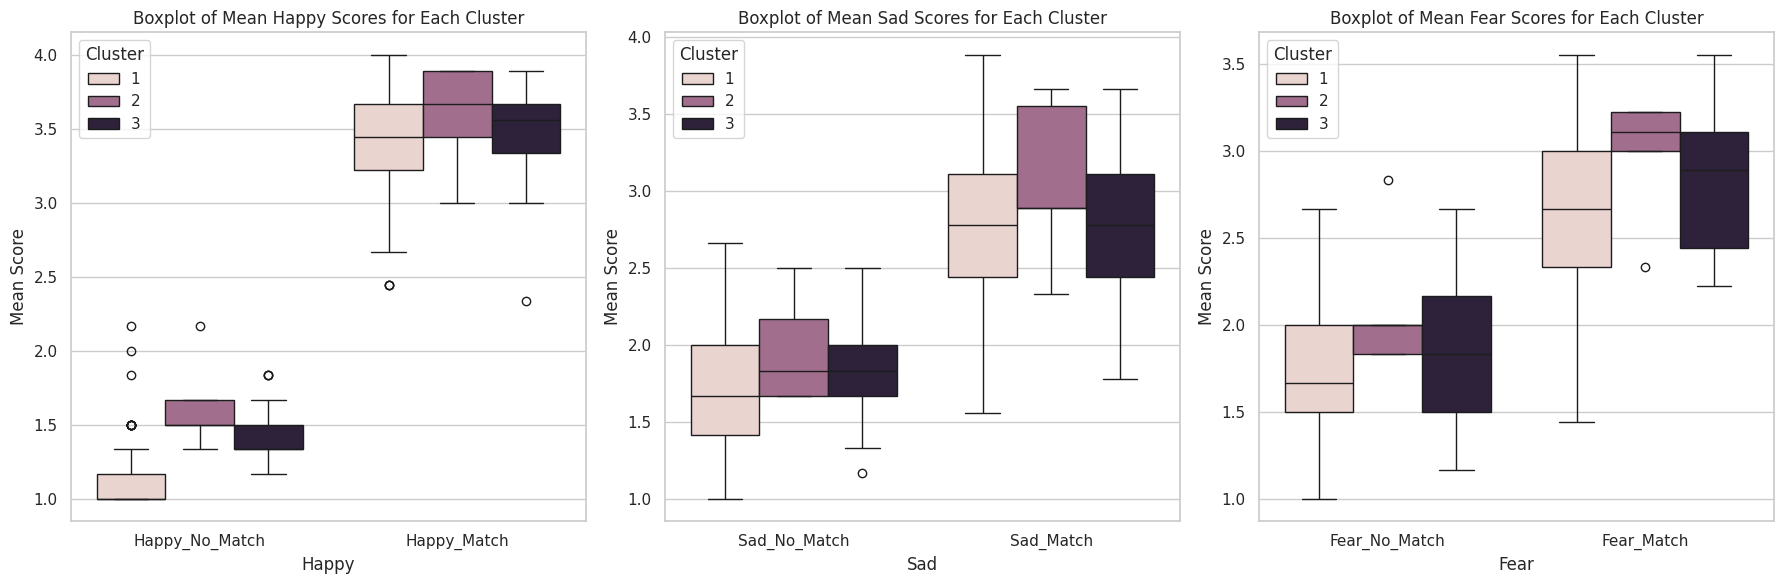

In [23]:
#Boxplots tasks
predictive_plots.create_boxplot_clusters(data,cluster_data_happy0)


#### Fear Match

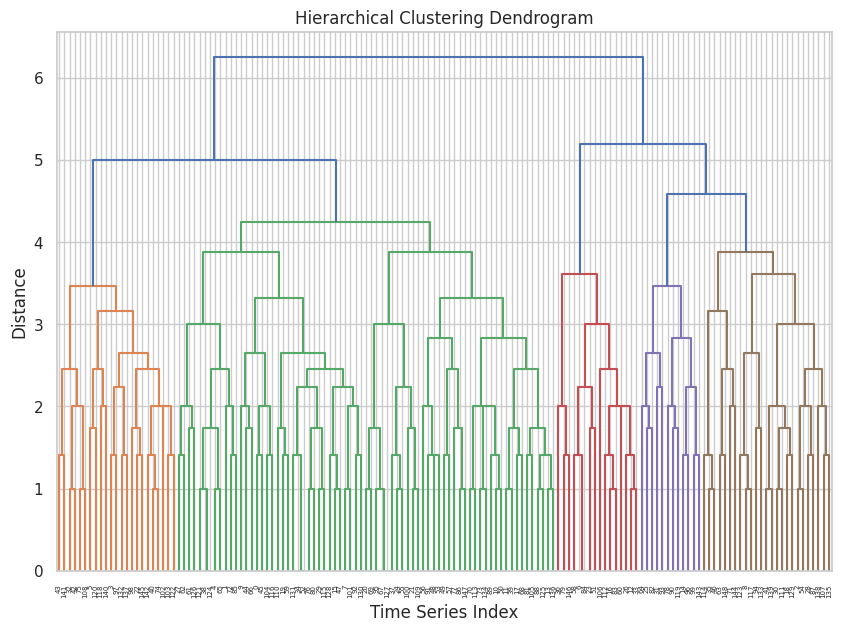

In [24]:
ts_data = temporal_fear_1.drop(["Subject ID"], axis=1).to_numpy()
Z = predictive_clustering.hierarchical_clustering_ts([ts_data],dtw.distance_matrix_fast,params=params)

In [25]:
params_clust = {'t':5,'criterion':'maxclust'}
cluster_data_fear1 =  predictive_clustering.create_cluster_df(Z,temporal_fear_1.copy(),params = params_clust)

print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_fear1["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_fear1["clusters"]))

Silhouette score: 0.0072837152120460895
Davies-Bouldin score: 4.851453784363999


In [26]:
name_output = f"time_series_fear_match.docx"
new_data = pd.merge(scales.copy(), cluster_data_fear1.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID", axis=1, inplace=True)

df = utils.filter_data(new_data)

utils.create_word(df, list_metrics, name_output)

/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots

In [27]:
output_name = f'Clusters_TimeSeries/time_series_predictive_processing_fear_match_clusters.xlsx'
utils.export_clusters_df(cluster_data_fear1.copy(),output_name)


In [28]:
# Scales Metrics
utils.create_metrics_cluster_df(cluster_data_fear1,scales)



,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,BIS_mean,...,RRQ_Rum_mean,RRQ_Ref_mean,ASI_P_mean,ASI_C_mean,ASI_S_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,35.30,20.87,5.02,3.16,8.91,10.22,12.17,7.82,6.65,21.57,...,3.20,3.57,4.09,3.57,8.43,2.22,2.00,1.89,1.56,1.67
2,33.22,20.25,4.92,2.86,8.89,9.84,10.78,7.45,7.08,21.38,...,3.40,3.35,4.86,3.57,8.00,1.93,2.60,1.76,1.69,1.95
3,33.19,21.38,4.91,3.64,8.06,9.06,10.38,6.69,7.12,22.62,...,3.45,3.36,4.19,2.94,9.88,3.07,3.21,1.71,2.93,2.07
4,31.00,20.08,4.64,2.77,9.25,9.83,9.25,8.00,7.50,21.42,...,3.15,3.53,3.75,4.42,6.92,2.18,3.00,2.36,1.18,2.82
5,32.52,19.12,4.83,3.15,9.20,10.08,10.92,7.08,7.04,21.84,...,3.21,3.16,5.64,3.44,8.60,2.47,2.89,2.42,2.53,3.68


In [29]:
#Means tasks
utils.create_mean_tasks(data,cluster_data_fear1)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,2.0,1.203196,3.453577,1.778539,2.858447,1.764840,2.911720
1,5.0,1.220000,3.311111,1.553333,2.680000,1.820000,2.275556
2,1.0,1.260870,3.483092,1.731884,2.748792,1.971014,2.705314
3,3.0,1.145833,3.465278,1.708333,2.881944,1.802083,2.916667
4,4.0,1.263889,3.277778,1.805556,2.305556,1.694444,2.148148


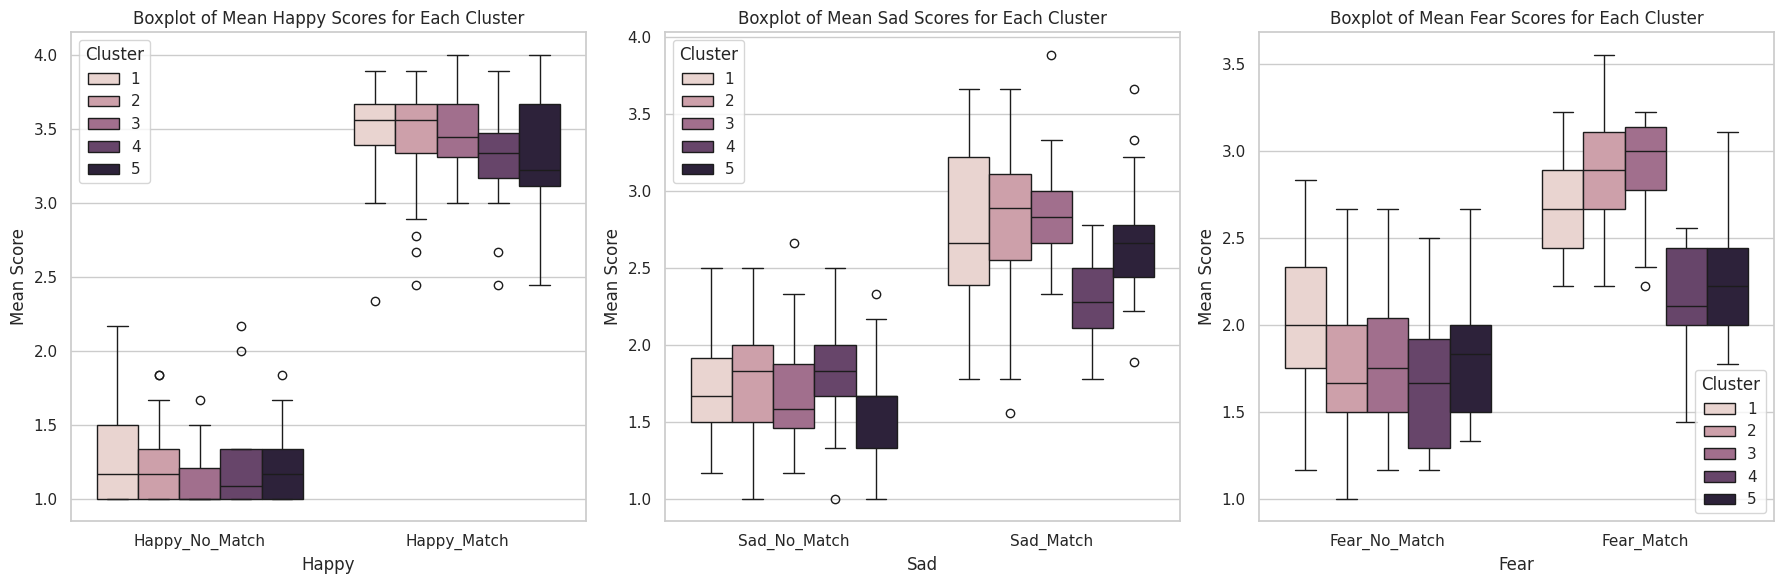

In [30]:
#Boxplots tasks
predictive_plots.create_boxplot_clusters(data,cluster_data_fear1)

#### Fear No Match

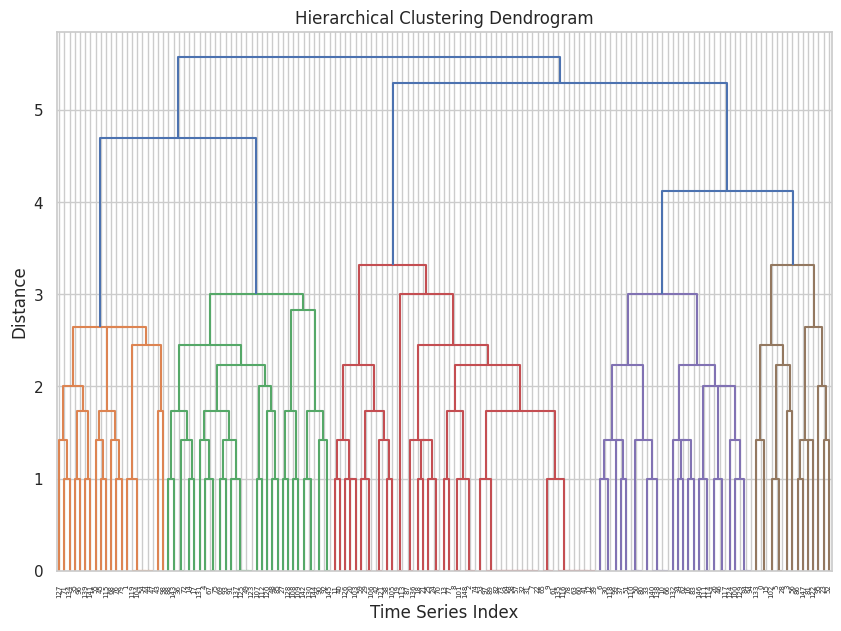

In [31]:
ts_data = temporal_fear_0.drop(["Subject ID"], axis=1).to_numpy()
Z = predictive_clustering.hierarchical_clustering_ts([ts_data],dtw.distance_matrix_fast,params=params)


In [32]:
params_clust = {'t':5,'criterion':'maxclust'}
cluster_data_fear0 =  predictive_clustering.create_cluster_df(Z,temporal_fear_0.copy(),params = params_clust)

print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_fear0["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_fear0["clusters"]))

#### Fear No Match

Silhouette score: 0.01617464300874908
Davies-Bouldin score: 4.520371634105031


In [33]:
name_output = f"time_series_fear_no_match.docx"
new_data = pd.merge(scales.copy(), cluster_data_fear0.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID", axis=1, inplace=True)

df = utils.filter_data(new_data)

utils.create_word(df, list_metrics, name_output)

/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots

In [34]:
output_name = f'Clusters_TimeSeries/time_series_predictive_processing_fear_no_match_clusters.xlsx'
utils.export_clusters_df(cluster_data_fear0.copy(),output_name)


In [35]:
# Scales Metrics
utils.create_metrics_cluster_df(cluster_data_fear0,scales)


,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,BIS_mean,...,RRQ_Rum_mean,RRQ_Ref_mean,ASI_P_mean,ASI_C_mean,ASI_S_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,34.95,20.57,5.06,3.17,9.95,10.29,10.43,6.95,6.24,21.05,...,3.32,3.66,5.60,2.95,8.67,2.06,2.13,1.94,1.88,1.62
2,33.19,19.59,4.93,2.95,8.84,9.75,10.53,7.09,7.28,22.03,...,3.42,3.49,4.81,4.10,6.56,2.23,2.59,2.45,1.45,2.77
3,31.57,20.20,4.92,2.94,9.02,10.22,11.29,7.67,7.10,22.08,...,3.39,3.14,4.02,3.47,9.02,2.07,2.59,1.95,2.11,2.11
4,33.70,20.13,4.71,2.99,8.60,9.17,10.57,7.24,7.33,21.10,...,3.14,3.33,4.87,3.87,8.03,2.58,3.38,1.71,2.42,2.42
5,35.73,21.73,4.87,3.43,7.60,9.60,11.20,8.13,6.93,21.07,...,3.23,3.53,5.40,2.87,9.40,2.21,2.36,1.43,1.07,2.50


In [36]:
#Means tasks
utils.create_mean_tasks(data,cluster_data_fear0)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,5.0,1.244444,3.437037,1.777778,2.674074,2.311111,2.903704
1,1.0,1.269841,3.354497,1.738095,2.899471,2.039683,2.714286
2,3.0,1.160131,3.435730,1.653595,2.642702,1.444444,2.636166
3,2.0,1.229167,3.378472,1.822917,2.871528,1.901042,2.722222
4,4.0,1.233333,3.481481,1.722222,2.833333,1.894444,2.733333


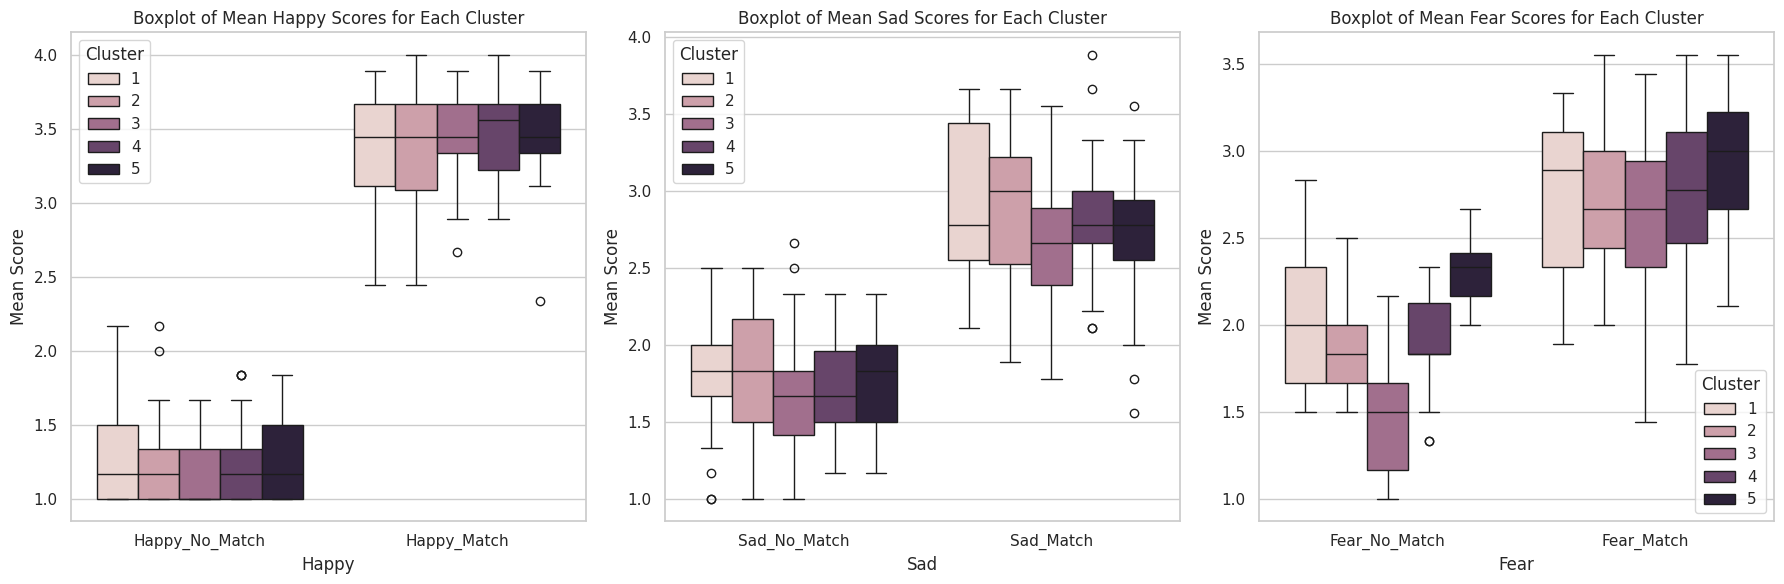

In [37]:
#Boxplots tasks
predictive_plots.create_boxplot_clusters(data,cluster_data_fear0)


#### Sad Match

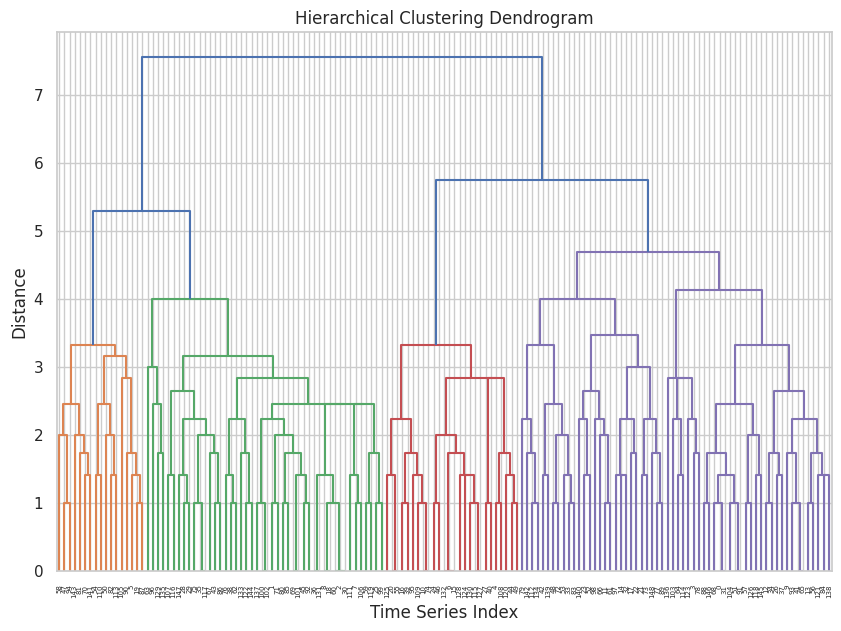

In [38]:
ts_data = temporal_sad_1.drop(["Subject ID"], axis=1).to_numpy()
params = {'method':'complete'}
Z = predictive_clustering.hierarchical_clustering_ts([ts_data],dtw.distance_matrix_fast,params=params)

In [39]:
params_clust = {'t':4,'criterion':'maxclust'}
cluster_data_sad1 =  predictive_clustering.create_cluster_df(Z,temporal_sad_1.copy(),params = params_clust)

print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_sad1["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_sad1["clusters"]))



Silhouette score: 0.010311368790236293
Davies-Bouldin score: 4.914281209295374


In [40]:
name_output = f"time_series_sad_match.docx"
new_data = pd.merge(scales.copy(), cluster_data_sad1.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID", axis=1, inplace=True)

df = utils.filter_data(new_data)

utils.create_word(df, list_metrics, name_output)

/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots

In [41]:
output_name = f'Clusters_TimeSeries/time_series_predictive_processing_sad_match_clusters.xlsx'
utils.export_clusters_df(cluster_data_sad1.copy(),output_name)


In [42]:
# Scales Metrics
utils.create_metrics_cluster_df(cluster_data_sad1,scales)


,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,BIS_mean,...,RRQ_Rum_mean,RRQ_Ref_mean,ASI_P_mean,ASI_C_mean,ASI_S_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,31.35,21.65,4.64,2.75,9.24,9.18,10.59,7.18,7.47,21.82,...,3.44,3.30,6.69,5.29,9.00,2.46,3.00,3.08,1.69,2.38
2,31.76,20.17,4.90,3.21,9.65,10.20,10.57,7.76,7.37,21.93,...,3.38,3.33,5.02,3.48,8.20,1.90,2.18,1.64,2.46,2.82
3,36.50,19.77,4.97,2.87,8.46,9.69,12.15,6.92,6.04,21.15,...,3.14,3.30,3.85,3.27,7.54,2.26,2.95,2.47,1.74,2.05
4,33.50,20.15,4.93,3.05,8.38,9.85,10.58,7.41,7.12,21.53,...,3.32,3.44,4.33,3.22,8.47,2.39,2.84,1.65,1.57,1.90


In [43]:
#Means tasks
utils.create_mean_tasks(data,cluster_data_sad1)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,4.0,1.191667,3.401852,1.672222,2.661111,1.708333,2.714815
1,2.0,1.271739,3.388889,1.721014,2.756039,1.898551,2.637681
2,3.0,1.134615,3.641026,1.884615,3.410256,1.955128,2.957265
3,1.0,1.254902,3.241830,1.705882,2.209150,1.656863,2.529412


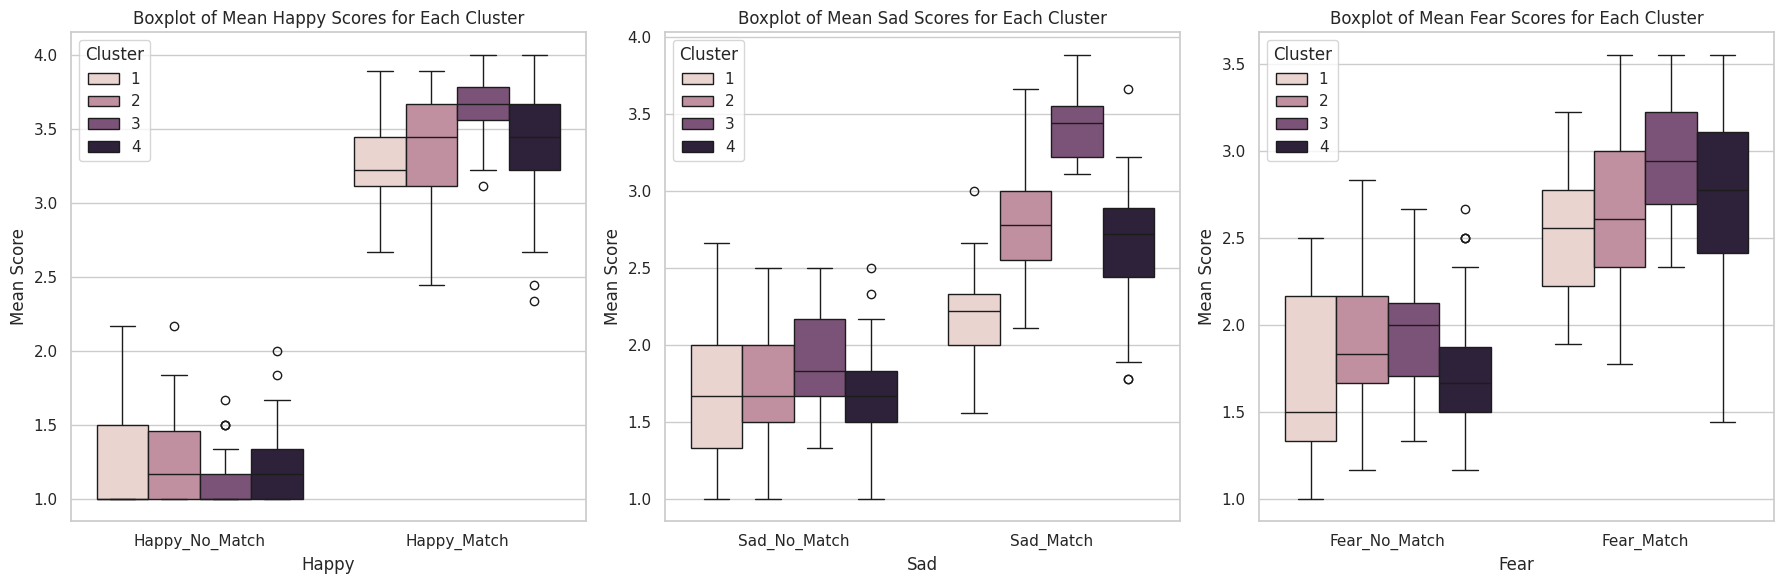

In [44]:
#Boxplots tasks
predictive_plots.create_boxplot_clusters(data,cluster_data_sad1)


#### Sad No Match

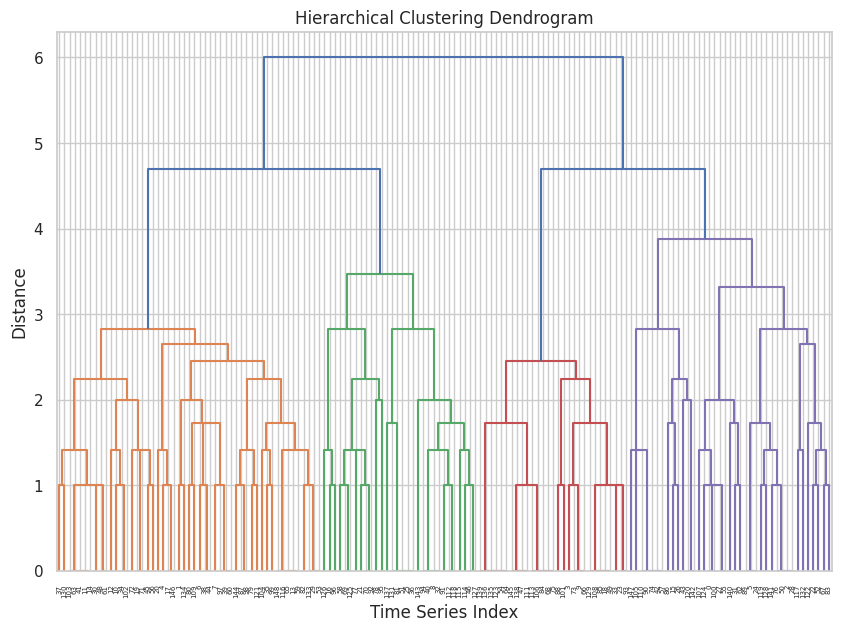

In [45]:
ts_data = temporal_sad_0.drop(["Subject ID"], axis=1).to_numpy()
Z = predictive_clustering.hierarchical_clustering_ts([ts_data],dtw.distance_matrix_fast,params=params)

In [46]:
params_clust = {'t':4,'criterion':'maxclust'}
cluster_data_sad0 = predictive_clustering.create_cluster_df(Z, temporal_sad_0.copy(), params=params_clust)


print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_sad0["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_sad0["clusters"]))



Silhouette score: 0.007553423205880923
Davies-Bouldin score: 4.9131225857099


In [47]:
name_output = f"time_series_sad_no_match.docx"
new_data = pd.merge(scales.copy(), cluster_data_sad0.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID", axis=1, inplace=True)

df = utils.filter_data(new_data)

utils.create_word(df, list_metrics, name_output)

/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots

In [48]:
output_name = f'Clusters_TimeSeries/time_series_predictive_processing_sad_non_match_clusters.xlsx'
utils.export_clusters_df(cluster_data_sad0.copy(),output_name)



In [49]:
# Scales Metrics
utils.create_metrics_cluster_df(cluster_data_sad0,scales)


,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,BIS_mean,...,RRQ_Rum_mean,RRQ_Ref_mean,ASI_P_mean,ASI_C_mean,ASI_S_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,33.06,20.51,4.94,3.07,8.53,10.20,11.14,7.37,7.33,21.25,...,3.35,3.27,4.92,3.90,8.16,1.94,2.62,2.00,2.12,2.58
2,31.23,19.83,5.05,3.28,8.70,9.93,10.30,7.13,7.07,21.83,...,3.35,3.49,4.27,3.30,7.63,2.95,3.11,2.40,2.75,2.50
3,31.86,20.45,4.80,3.00,9.48,9.86,11.10,7.59,6.93,22.45,...,3.52,3.27,5.79,3.66,9.31,2.32,2.68,1.68,1.36,2.05
4,36.05,20.13,4.77,2.83,9.05,9.33,10.72,7.53,6.74,21.33,...,3.11,3.48,3.97,3.21,8.18,2.10,2.43,1.70,1.37,1.80


In [50]:
#Means tasks
utils.create_mean_tasks(data,cluster_data_sad0)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,4.0,1.264957,3.524217,1.811966,2.840456,1.982906,2.760684
1,1.0,1.215686,3.418301,1.764706,2.825708,1.754902,2.742919
2,3.0,1.189655,3.268199,1.339080,2.574713,1.632184,2.513410
3,2.0,1.166667,3.440741,1.933333,2.770370,1.822222,2.788889


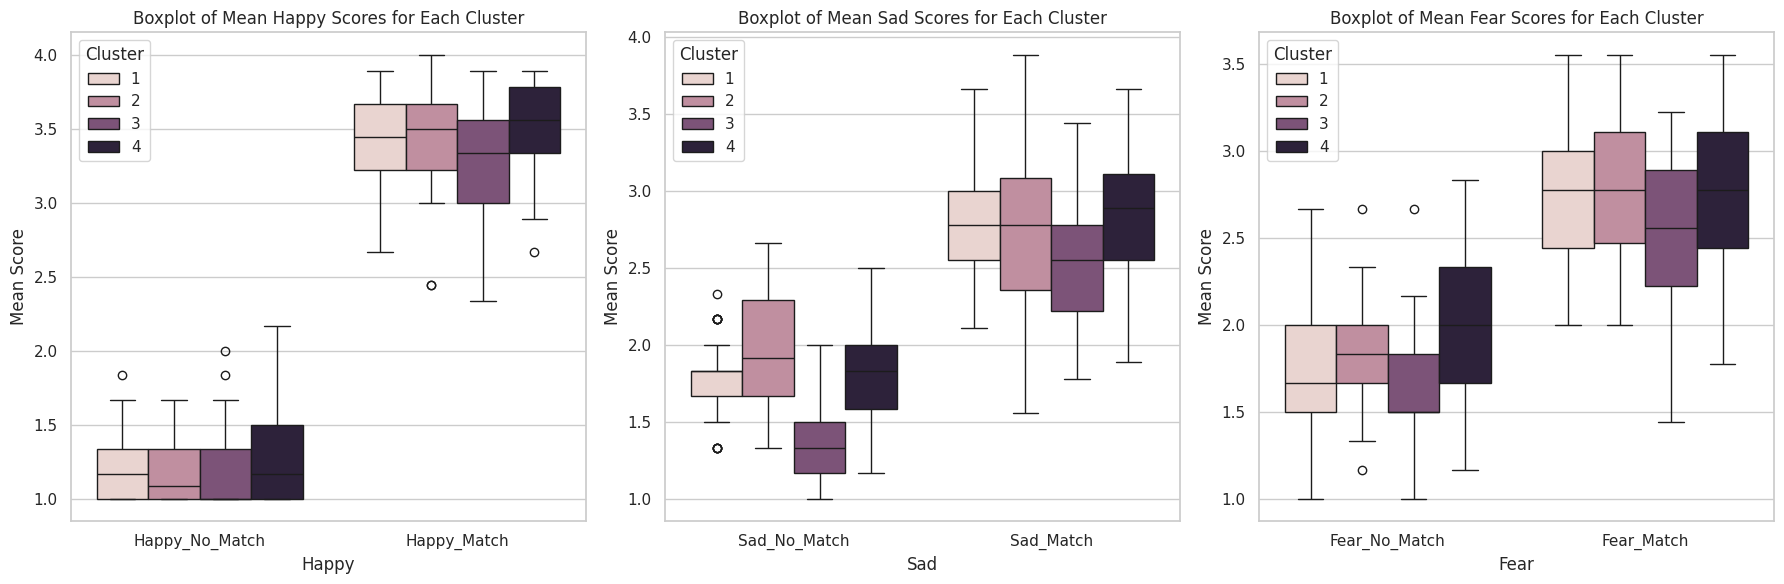

In [51]:
#Boxplots tasks
predictive_plots.create_boxplot_clusters(data,cluster_data_sad0)


## Cluster averaged sum of distances

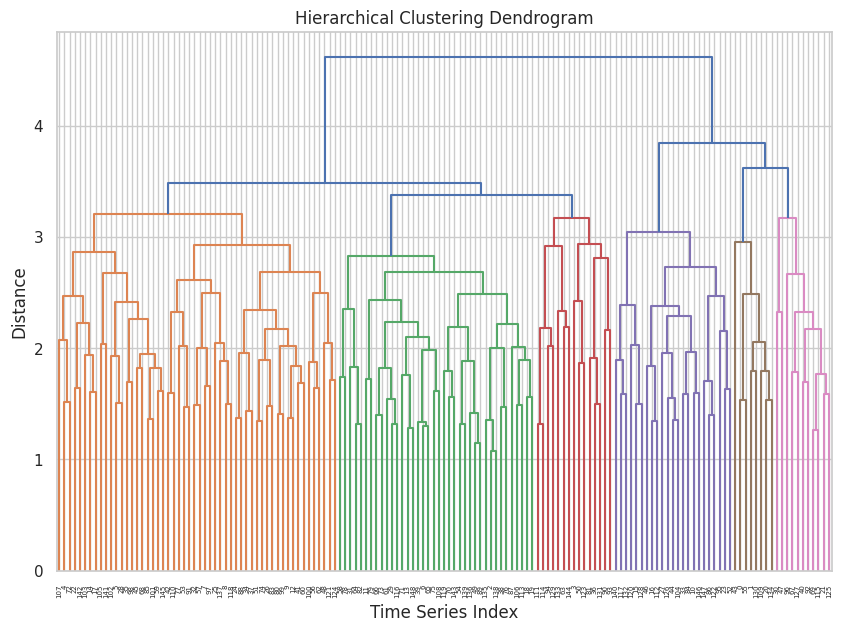

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform


list_timeseries = [temporal_sad_0.drop(["Subject ID"], axis=1).to_numpy(),temporal_sad_1.drop(["Subject ID"], axis=1).to_numpy(),temporal_fear_0.drop(["Subject ID"], axis=1).to_numpy(),temporal_fear_1.drop(["Subject ID"], axis=1).to_numpy(),temporal_happy_0.drop(["Subject ID"], axis=1).to_numpy(),temporal_happy_1.drop(["Subject ID"], axis=1).to_numpy()]

Z= predictive_clustering.hierarchical_clustering_ts(list_timeseries,dtw.distance_matrix_fast,params=params)


In [53]:
params_clust = {'t':6,'criterion':'maxclust'}
cluster_data_average = predictive_clustering.create_cluster_df(Z, data.copy(), params=params_clust)

print("Silhouette score:",silhouette_score(data.drop("Subject ID",axis=1),cluster_data_average["clusters"],metric="manhattan"))
print("Davies-Bouldin score:",davies_bouldin_score(data.drop("Subject ID",axis=1),cluster_data_average["clusters"]))


Silhouette score: 0.003337060193631856
Davies-Bouldin score: 4.531356219880241


In [54]:
name_output = f"time_series_all.docx"
new_data = pd.merge(scales.copy(), cluster_data_average.copy(), right_on='Subject ID', left_on='EPRIME_CODE')
new_data.drop("Subject ID", axis=1, inplace=True)

df = utils.filter_data(new_data)

utils.create_word(df, list_metrics, name_output)

/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/home/diego/PycharmProjects/CasLAB-Predictive-Processing/Clustering_Predictive_Processing/predictive_plots

In [55]:
output_name = f'Clusters_TimeSeries/time_series_predictive_processing_all_emotions_clusters.xlsx'
utils.export_clusters_df(cluster_data_sad0.copy(),output_name)


In [56]:
# Scales Metrics
cluster_metrics_average = utils.create_metrics_cluster_df(cluster_data_average,scales)
cluster_metrics_average["length_cluster"] = np.unique(cluster_data_average["clusters"],return_counts=True)[1]
cluster_metrics_average.insert(0, 'length_cluster', cluster_metrics_average.pop('length_cluster'))
cluster_metrics_average

,length_cluster,PA_mean,NA._mean,ERQ_CR_mean,ERQ_ES_mean,UPPSP_NU_mean,UPPSP_PU_mean,UPPSP_SS_mean,UPPSP_PMD_mean,UPPSP_PSV_mean,...,RRQ_Rum_mean,RRQ_Ref_mean,ASI_P_mean,ASI_C_mean,ASI_S_mean,SPQ_mean,SPQ_IR_mean,MSSB_POS_mean,MSSB_NEG_mean,MSSB_DES_mean
1,54,31.94,19.89,4.86,3.44,8.87,9.76,11.13,7.35,7.19,...,3.35,3.38,4.19,3.57,7.76,2.46,2.62,1.73,1.94,2.33
2,38,32.76,18.68,4.87,2.49,8.74,9.76,11.05,7.71,7.34,...,3.25,3.32,4.29,3.34,7.55,1.70,2.60,1.93,1.70,1.70
3,15,30.93,21.20,4.76,3.42,9.53,9.93,10.00,7.67,7.47,...,3.30,3.13,7.33,4.60,9.67,3.18,2.91,2.73,3.09,3.55
4,23,37.57,21.74,5.22,2.71,8.74,9.39,10.57,6.82,6.30,...,3.36,3.52,5.35,3.83,9.65,2.50,2.94,1.78,1.44,2.44
5,8,35.62,23.75,4.79,3.28,9.38,10.50,10.88,6.50,5.75,...,3.44,3.31,4.75,2.38,11.50,1.20,2.60,3.20,1.40,1.60
6,11,33.64,20.64,4.68,2.91,8.55,11.00,10.55,8.09,7.27,...,3.30,3.49,3.82,3.00,6.27,1.38,2.14,1.62,2.12,2.38


In [57]:
#Means tasks
utils.create_mean_tasks(data,cluster_data_average)


,Cluster,Happy_0,Happy_1,Sad_0,Sad_1,Fear_0,Fear_1
0,5.0,1.500000,3.652778,2.083333,3.416667,2.187500,3.138889
1,2.0,1.021930,3.342105,1.517544,2.634503,1.491228,2.453216
2,3.0,1.466667,3.074074,1.588889,2.333333,1.900000,2.444444
3,1.0,1.311728,3.500000,1.740741,2.699588,1.802469,2.761317
4,4.0,1.028986,3.603865,1.869565,3.120773,2.057971,2.932367
5,6.0,1.227273,3.232323,2.030303,2.969697,1.954545,2.959596


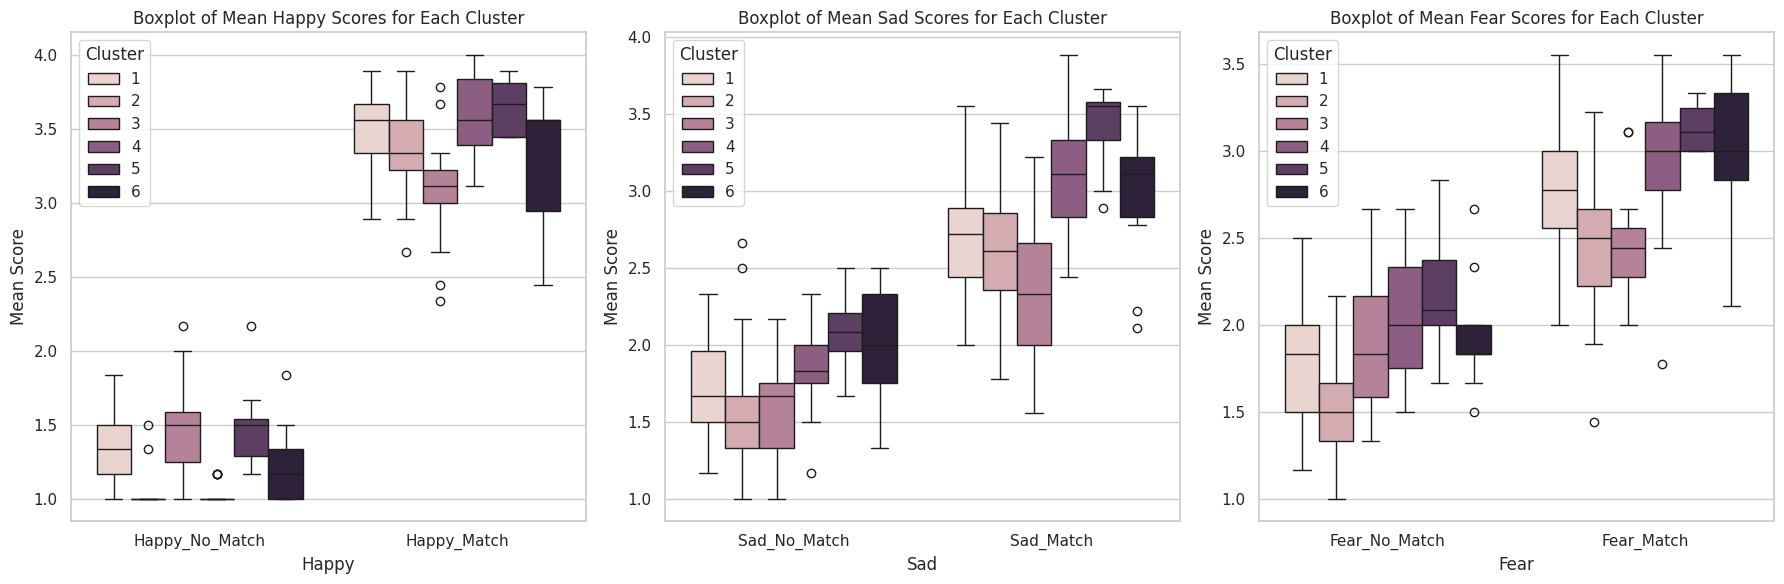

In [58]:
#Boxplots tasks
predictive_plots.create_boxplot_clusters(data,cluster_data_average)


### Prediction on Rating0 differenciated by Match and Emotion on RETOS & BEBRASK using Moving Average Time Series


In [ ]:
data = pd.read_excel("RETOS_BEBRASK_Rating0_Time_MA_Series.xlsx")
data

In [ ]:
temporal_happy_0 = data[["Subject ID","Happy_0_MA_0","Happy_0_MA_1","Happy_0_MA_2","Happy_0_MA_3"]]
temporal_happy_1 = data[["Subject ID","Happy_1_MA_0","Happy_1_MA_1","Happy_1_MA_2","Happy_1_MA_3","Happy_1_MA_4","Happy_1_MA_5","Happy_1_MA_6"]]
temporal_fear_0 = data[["Subject ID","Fear_0_MA_0","Fear_0_MA_1","Fear_0_MA_2","Fear_0_MA_3"]]
temporal_fear_1 = data[["Subject ID","Fear_1_MA_0","Fear_1_MA_1","Fear_1_MA_2","Fear_1_MA_3","Fear_1_MA_4","Fear_1_MA_5","Fear_1_MA_6"]]
temporal_sad_0 = data[["Subject ID","Sad_0_MA_0","Sad_0_MA_1","Sad_0_MA_2","Sad_0_MA_3"]]
temporal_sad_1 = data[["Subject ID","Sad_1_MA_0","Sad_1_MA_1","Sad_1_MA_2","Sad_1_MA_3","Sad_1_MA_4","Sad_1_MA_5","Sad_1_MA_6"]]

## Hierarchical Clustering using Dynamic Time Warping

#### Happy Match

In [ ]:
time_series_data = temporal_happy_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
clusters_happy_match = fcluster(Z, 2, criterion='maxclust')


#### Happy Non Match

In [ ]:
time_series_data = temporal_happy_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
clusters_happy_non_match = fcluster(Z, 3, criterion='maxclust')

#### Fear Match

In [ ]:
time_series_data = temporal_fear_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()


In [ ]:
clusters_fear_match = fcluster(Z, 3, criterion='maxclust')


#### Fear Non Match


In [ ]:
time_series_data = temporal_fear_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()



In [ ]:
clusters_fear_no_match = fcluster(Z, 3, criterion='maxclust')

#### Sad Match

In [ ]:
time_series_data = temporal_sad_1.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
clusters_sad_match = fcluster(Z, 3, criterion='maxclust')


#### Sad No Match

In [ ]:
time_series_data = temporal_sad_0.drop(["Subject ID"], axis=1).to_numpy()
time_series_data = time_series_data.astype(np.float64)
# Convert distance_matrix to float, if it's not already

distance_matrix = dtw.distance_matrix_fast(time_series_data)

distance_matrix = distance_matrix.astype(np.float64)

condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
clusters_sad_no_match = fcluster(Z, 3, criterion='maxclust')